In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import itertools
from PIL import Image

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= 'C:/Users/alaog/Downloads/archive (10)/Vegetable Images/train'
filepaths=[]
labels=[]
folds=os.listdir(train_data)

for fold in folds:
    foldpath=os.path.join(train_data,fold)
    filelist=os.listdir(foldpath)
    
    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)
        
        labels.append(fold)
        filepaths.append(fillpath)
        
file_series=pd.Series(filepaths,name='imagepaths')
label_series=pd.Series(labels,name='labels')
train_df=pd.concat([file_series,label_series],axis=1)

In [3]:
train_df.tail()

,imagepaths,labels
14995,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
14996,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
14997,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
14998,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
14999,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato


In [4]:
val_data= 'C:/Users/alaog/Downloads/archive (10)/Vegetable Images/validation'
filepaths=[]
labels=[]
folds=os.listdir(val_data)

for fold in folds:
    foldpath=os.path.join(val_data,fold)
    filelist=os.listdir(foldpath)
    
    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)
        
        labels.append(fold)
        filepaths.append(fillpath)
        
file_series=pd.Series(filepaths,name='imagepaths')
label_series=pd.Series(labels,name='labels')
val_df=pd.concat([file_series,label_series],axis=1)

In [5]:
val_df.tail()

,imagepaths,labels
2995,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
2996,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
2997,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
2998,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato
2999,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Tomato


In [6]:
test_data= 'C:/Users/alaog/Downloads/archive (10)/Vegetable Images/test'
filepaths=[]
labels=[]
folds=os.listdir(test_data)

for fold in folds:
    foldpath=os.path.join(test_data,fold)
    filelist=os.listdir(foldpath)
    
    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)
        
        labels.append(fold)
        filepaths.append(fillpath)
        
file_series=pd.Series(filepaths,name='imagepaths')
label_series=pd.Series(labels,name='labels')
test_df=pd.concat([file_series,label_series],axis=1)

In [7]:
test_df.head()

,imagepaths,labels
0,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Bean
1,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Bean
2,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Bean
3,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Bean
4,C:/Users/alaog/Downloads/archive (10)/Vegetabl...,Bean


In [8]:
batch_size = 30
image_size = (224, 224)

train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()


train_generator = train_gen.flow_from_dataframe( train_df, x_col= 'imagepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_generator = val_gen.flow_from_dataframe( val_df, x_col= 'imagepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_generator = test_gen.flow_from_dataframe( test_df, x_col= 'imagepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 15000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.


In [ ]:
g_dict = train_generator.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_generator)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Print the class encodings done by the generators
class_map = dict([(v,k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [11]:
model = Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fifth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(15, activation='softmax') #4 output neurons representing the 4 classes in the dataset
])
                           
model.compile(optimizer = RMSprop(learning_rate=1e-4), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [12]:
history = model.fit(train_generator, epochs= 15, verbose= 1, validation_data= valid_generator, shuffle= False)

Epoch 1/15
500/500 [==============================] - 201s 400ms/step - loss: 1.6042 - accuracy: 0.5531 - val_loss: 0.6974 - val_accuracy: 0.7567
Epoch 2/15
500/500 [==============================] - 153s 306ms/step - loss: 0.5238 - accuracy: 0.8278 - val_loss: 0.4563 - val_accuracy: 0.8483
Epoch 3/15
500/500 [==============================] - 151s 303ms/step - loss: 0.2901 - accuracy: 0.9078 - val_loss: 0.3132 - val_accuracy: 0.8970
Epoch 4/15
500/500 [==============================] - 151s 303ms/step - loss: 0.1804 - accuracy: 0.9444 - val_loss: 0.1973 - val_accuracy: 0.9420
Epoch 5/15
500/500 [==============================] - 152s 304ms/step - loss: 0.1147 - accuracy: 0.9647 - val_loss: 0.1514 - val_accuracy: 0.9587
Epoch 6/15
500/500 [==============================] - 155s 310ms/step - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.2238 - val_accuracy: 0.9403
Epoch 7/15
500/500 [==============================] - 152s 303ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.2324 -

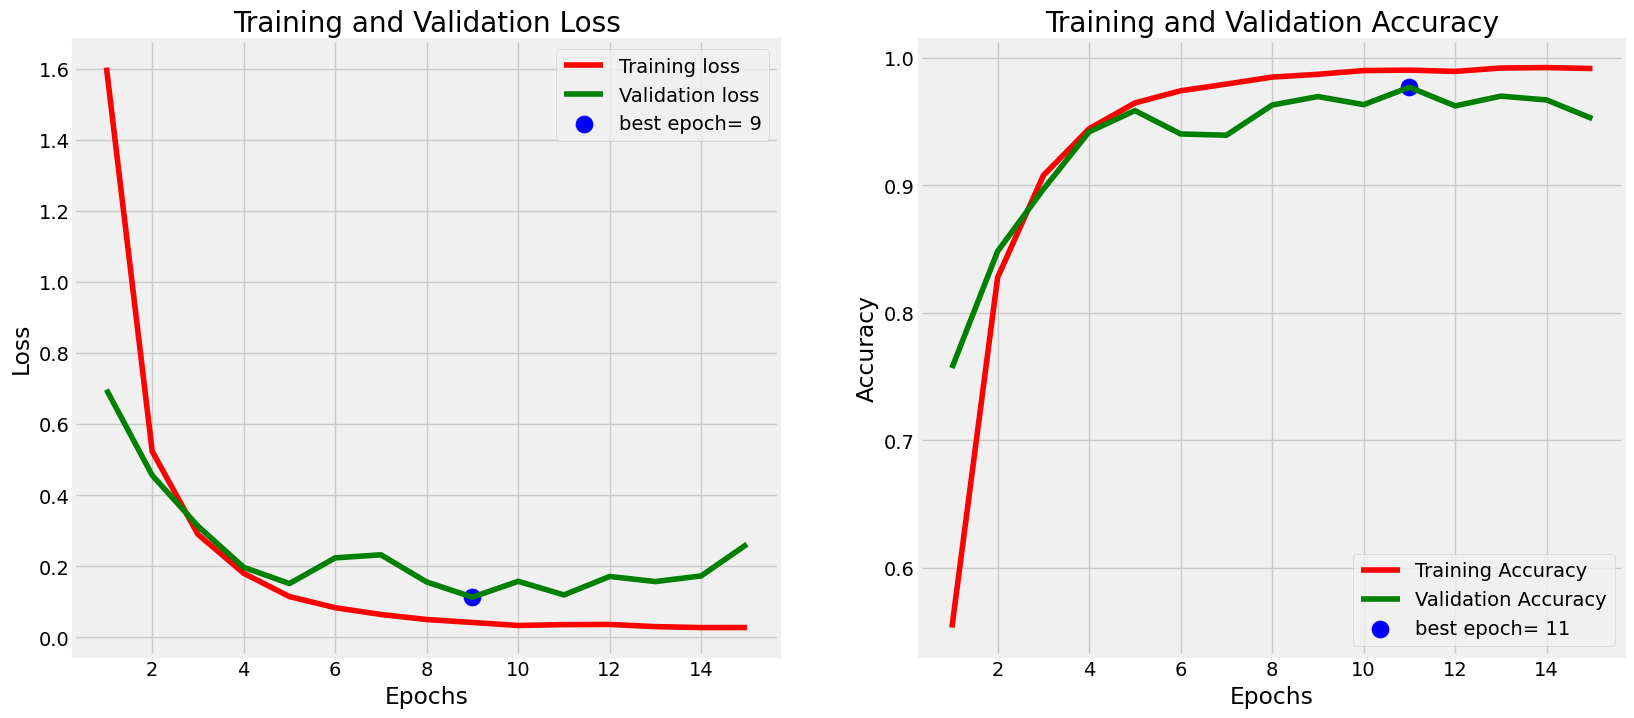

In [13]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(valid_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

100/100 [==============================] - 32s 319ms/step - loss: 0.2729 - accuracy: 0.9503
Train Loss:  0.030669357627630234
Train Accuracy:  0.9899333119392395
--------------------
Validation Loss:  0.26215851306915283
Validation Accuracy:  0.9523333311080933
--------------------
Test Loss:  0.2729186713695526
Test Accuracy:  0.9503333568572998


In [15]:
preds = model.predict(test_generator)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)

100/100 [==============================] - 7s 67ms/step


In [16]:
print(y_pred)

[ 0  0  0 ... 14 14 14]


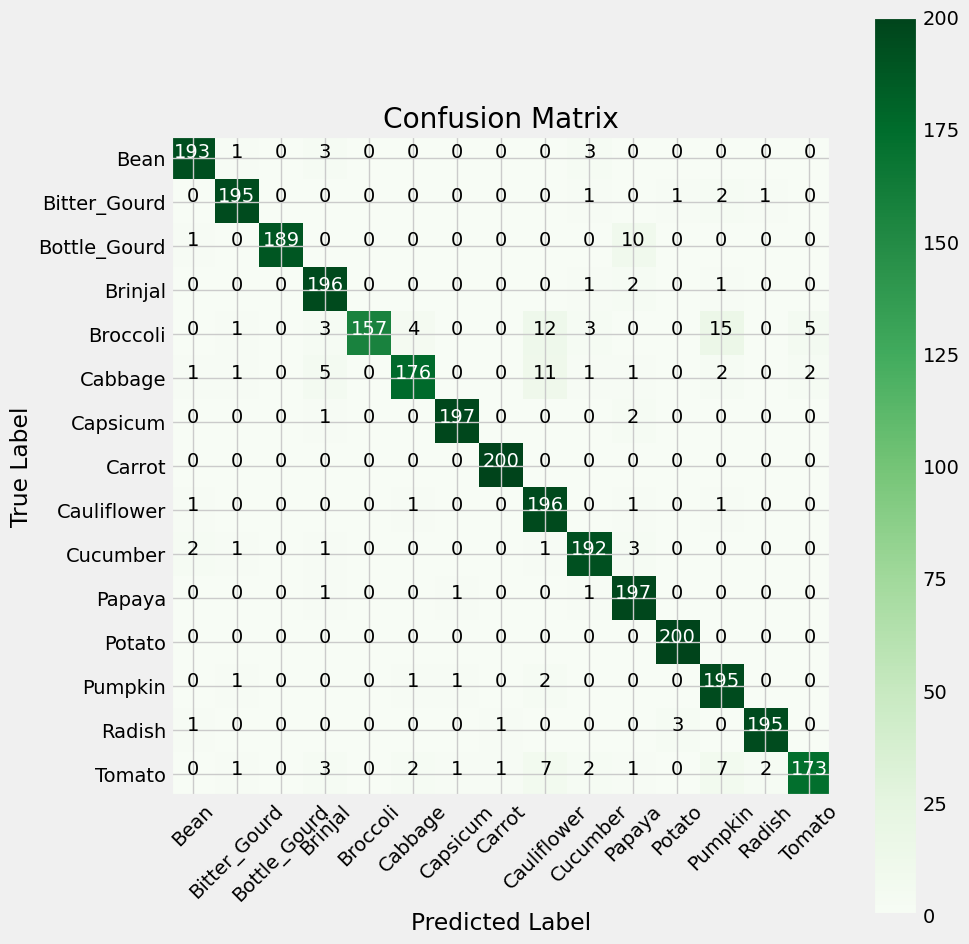

In [17]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [18]:
len(test_generator)

100

In [19]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

        Bean       0.97      0.96      0.97       200
Bitter_Gourd       0.97      0.97      0.97       200
Bottle_Gourd       1.00      0.94      0.97       200
     Brinjal       0.92      0.98      0.95       200
    Broccoli       1.00      0.79      0.88       200
     Cabbage       0.96      0.88      0.92       200
    Capsicum       0.98      0.98      0.98       200
      Carrot       0.99      1.00      1.00       200
 Cauliflower       0.86      0.98      0.91       200
    Cucumber       0.94      0.96      0.95       200
      Papaya       0.91      0.98      0.94       200
      Potato       0.98      1.00      0.99       200
     Pumpkin       0.87      0.97      0.92       200
      Radish       0.98      0.97      0.98       200
      Tomato       0.96      0.86      0.91       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95   